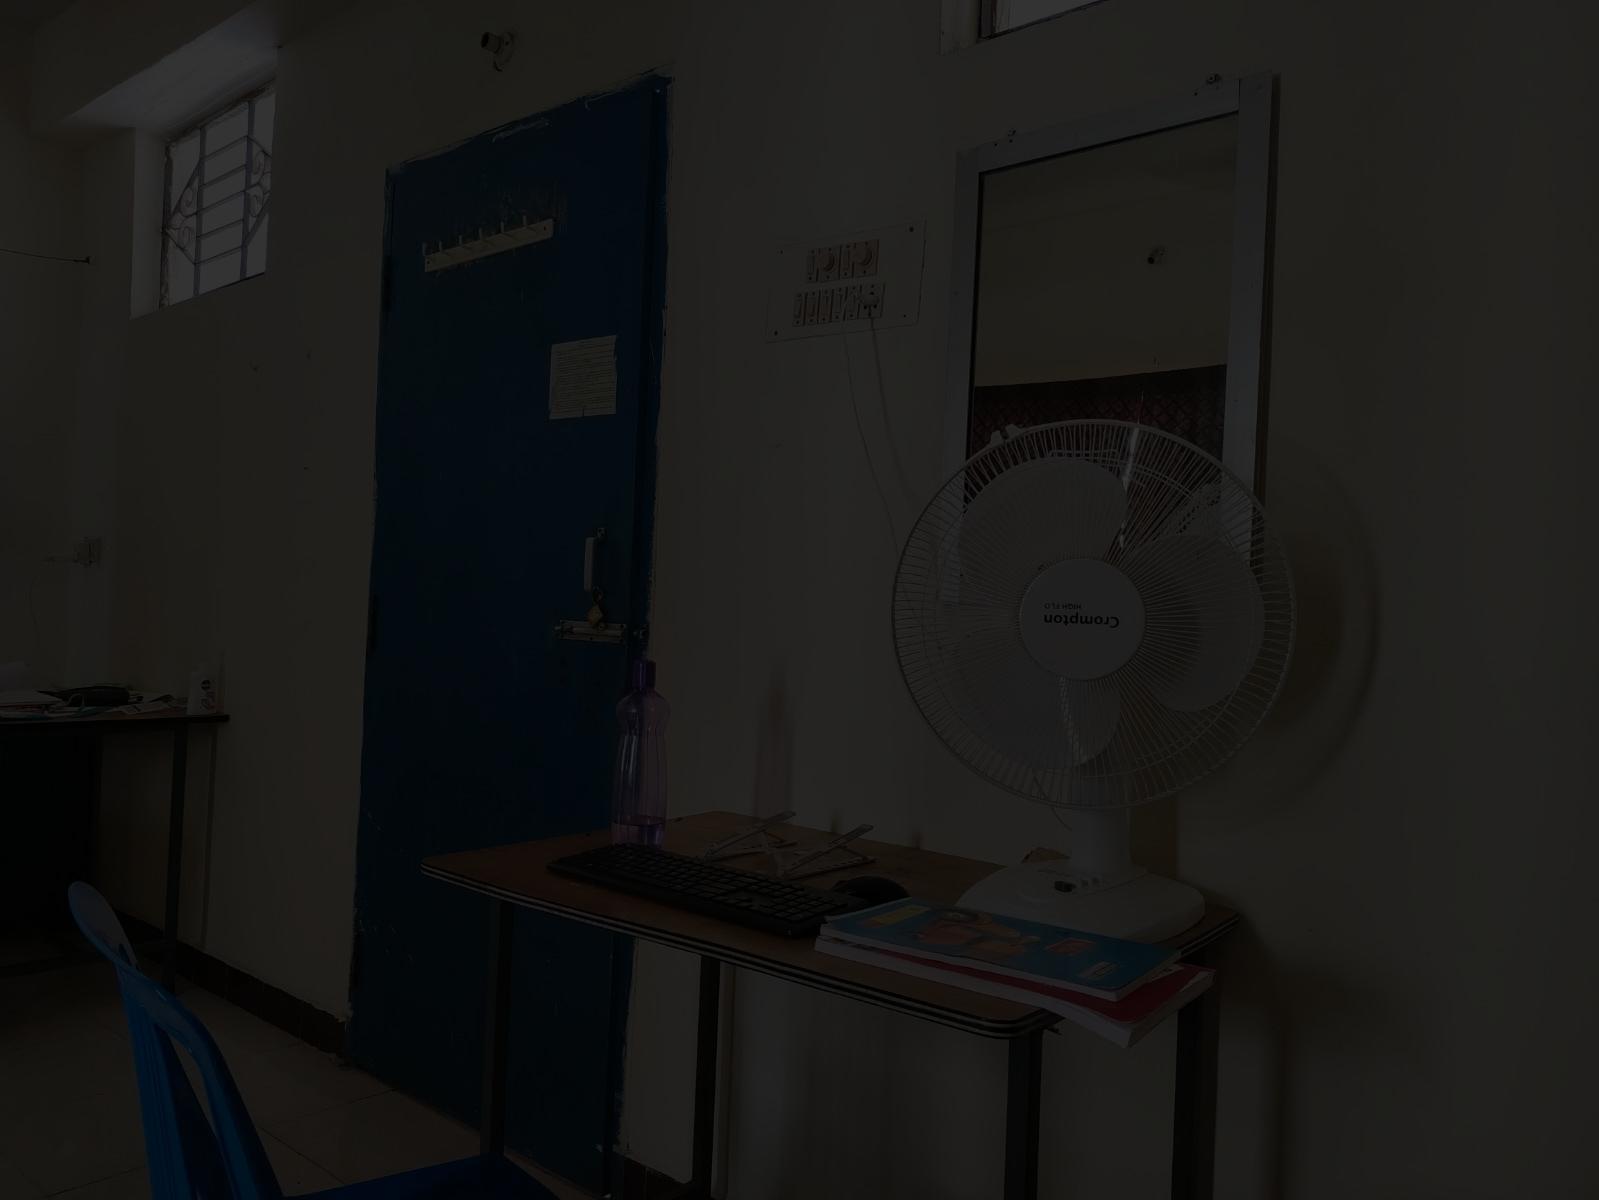

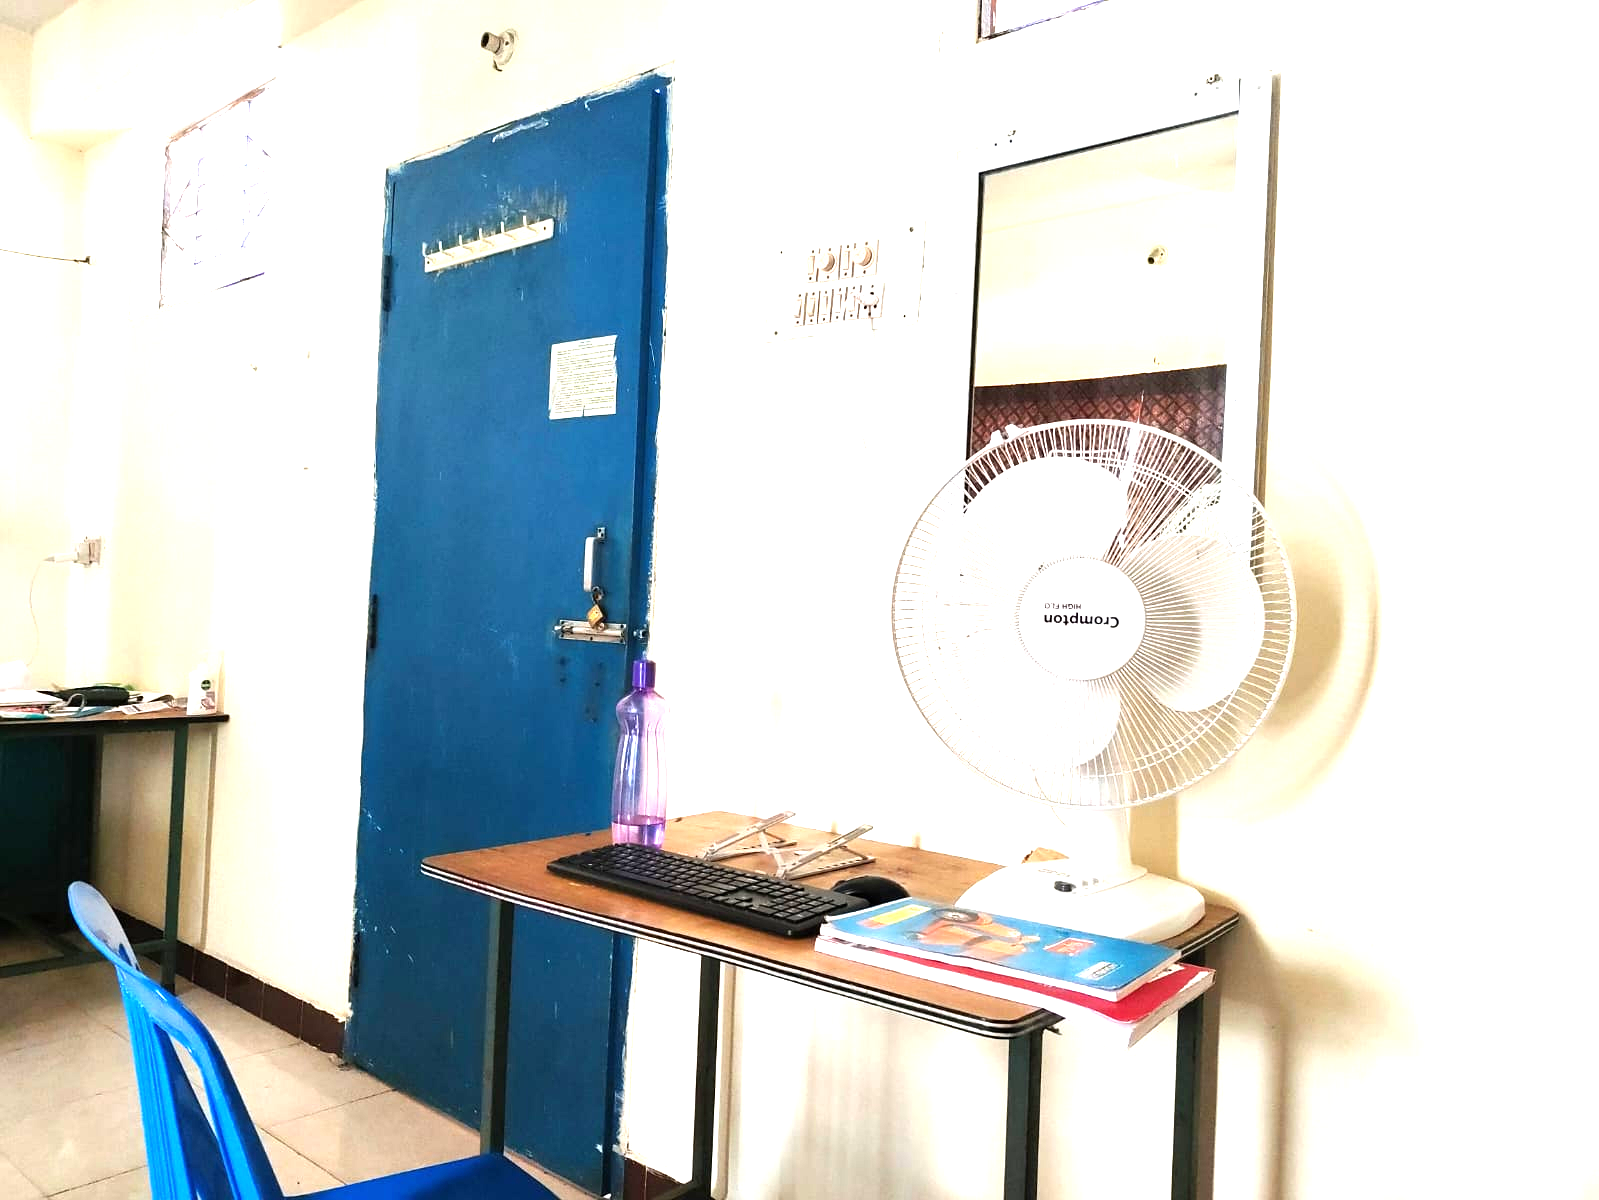

In [ ]:

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('/content/Test_img.02.03 AM.jpeg')

# Define the number of exposures
num_exposures = 14

# Create a list to store images with different exposures
exposed_images = []

# Exposure range, adjust as necessary
exposure_factors = np.linspace(0.2, 2.0, num_exposures)

for i, exposure in enumerate(exposure_factors):
    # Apply exposure adjustment
    adjusted_image = cv2.convertScaleAbs(image, alpha=exposure, beta=0)

    # Save the image or add to list
    exposed_images.append(adjusted_image)
    cv2.imwrite(f'exposed_image_{i+1}.jpg', adjusted_image)

# Optionally, display the first and last adjusted image
cv2_imshow(exposed_images[0])
cv2_imshow(exposed_images[-1])


In [ ]:
#Best for my purpose (For now use this for data augentation)
import cv2
import numpy as np

def adjust_exposure(image, gamma):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Load your image
image = cv2.imread('/content/Test_img.02.03 AM.jpeg')

# Generate 14 variations with different exposure levels
exposures = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8]
for i, gamma in enumerate(exposures):
    adjusted_image = adjust_exposure(image, gamma)
    cv2.imwrite(f'output_image_{i}.jpg', adjusted_image)